<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_Exercise_Session_1_ANN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Simple Neural Network from Scratch with PyTorch and Google Colab

Before we look at why neural networks work, it’s important to understand what neural networks do. Before we can grasp the design of a neural network, we must first understand what a neuron performs.

1. First, a weight is being applied to each input to an artificial neuron. 
2. Second, the inputs are multiplied by their weights, and then a bias is applied to the outcome. This is called the weighted sum. 
3. Third, the weighted sum is processed via an activation function, as a non-linear function.

![image.png](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/13UpdymQx-C1tBKRnfD7eOg.gif)

The neural network can compare the outputs of its nodes with the desired values using a property known as the delta rule, allowing the network to alter its weights through training to create more accurate output values. This training and learning procedure results in gradient descent. 

The technique of updating weights in multi-layered perceptrons is virtually the same, however, the process is referred to as back-propagation. In such circumstances, the output values provided by the final layer are used to alter each hidden layer inside the network.

In order to build a neural network, the following steps must be followed:

1. Creating a FeedForwardNetwork
2. FeedForward Evaluation
3. Backward / Gradient Calculation
4. Back Propagation
5. Training

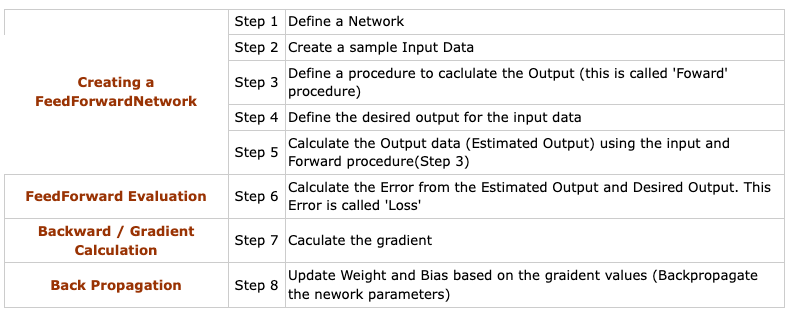

# PyTorch - nn.Linear: Creating a simple Artificial neural network with 1 node and training with 1 sample of data

nn.Linear(n,m) is a module that creates single layer feed forward network with n inputs and m output. Mathematically, this module is designed to calculate the linear equation Ax = b where x is input, b is output, A is weight. This is where the name 'Linear' came from.

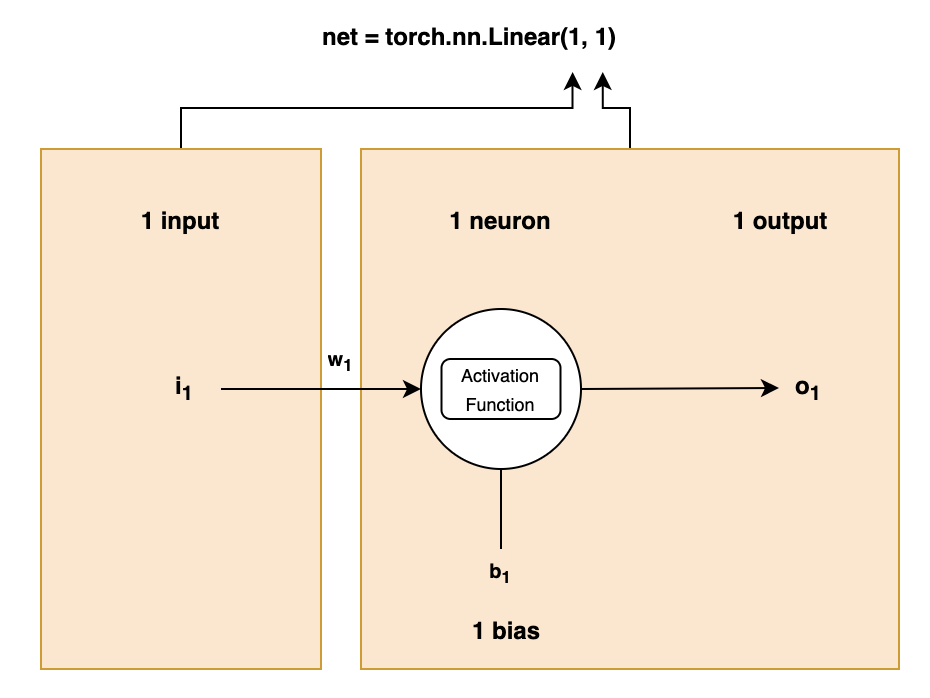

The torch module provides all the necessary tensor operators you will need to implement your first neural network from scratch in PyTorch. That's right! In PyTorch everything is a Tensor, so this is the first thing you will need to get used to. Let's import the libraries we will need for this tutorial.

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import MinMaxScaler

Let's start by creating some sample data using the torch.tensor command. In Numpy, this could be done with np.array. Both functions serve the same purpose, but in PyTorch everything is a Tensor as opposed to a vector or matrix. 

In [2]:
x = torch.tensor([[0.1]])
y = torch.tensor([[1.2]])
print("input:  ",x)
print('Target:  ', y)

input:   tensor([[0.1000]])
Target:   tensor([[1.2000]])


You can check the type of the tensors we have just created with the dtype command.

In [3]:
print(x.dtype)
print(y.dtype)

torch.float32
torch.float32


## 1. Creating a FeedForwardNetwork

A neuron consists of two parts, a linear part and an activation function. It is the activation function that performs the non-linearity part of the neuron. To create the first step, we use torch.nn.linear.

In [4]:
model_net1 = torch.nn.Linear(1,1)

In [5]:
print('network structure (torch.nn.Linear(1,1)):  ',model_net1)
print('Weight of network:  ',model_net1.weight)
print('Bias of network: ',model_net1.bias)

network structure (torch.nn.Linear(1,1)):   Linear(in_features=1, out_features=1, bias=True)
Weight of network:   Parameter containing:
tensor([[-0.2693]], requires_grad=True)
Bias of network:  Parameter containing:
tensor([0.7223], requires_grad=True)


Using torch.nn.type_of_activationfunction, we can define an activation function for the neuron.

In [6]:
model_net1_actfun = torch.nn.Sigmoid()

These two steps can be connected using forward(). We can therefore provide the output by using this process. 

In [7]:
# torch.mm(net.weight,x.t()) + net.bias

output = model_net1_actfun.forward(model_net1.forward(x))
print('Output: ',output)

Output:  tensor([[0.6672]], grad_fn=<SigmoidBackward0>)


## 2. FeedForward Evaluation

Evaluation of feedforward refers to the process of assessing the performance of a feedforward neural network using the current weights, to produce predictions. These predictions are then compared to the actual target outputs to measure the accuracy of the network.

In [8]:
# NOTE : you see 'None' here since backward() hasn't been executed yet
print('Weight gradient:  ',model_net1.weight.grad)
print('Bias gradient:  ',model_net1.bias.grad)

Weight gradient:   None
Bias gradient:   None


The metrics used for evaluation can vary, but common ones include mean squared error, cross-entropy loss, and so for. The results of the evaluation can provide insights into how well the network predicts and how to further improve the network through hyperparameter tuning.

In [9]:
# define the error function (loss fuction)
loss_mse = torch.nn.MSELoss()
loss = loss_mse(output, y)
print('Loss: ',loss)

Loss:  tensor(0.2839, grad_fn=<MseLossBackward0>)


##3. Backward / Gradient Calculation

In this step, the error is used to calculate the gradient of the loss with respect to the weights. This gradient can be used to update the parameters using gradient descent optimization, in order to minimize the loss and improve the network's accuracy. 

In [10]:
loss.backward()

In [11]:
print('Weight gradient:  ', model_net1.weight.grad)
print('Bias gradient:  ', model_net1.bias.grad)

Weight gradient:   tensor([[-0.0237]])
Bias gradient:   tensor([-0.2366])


##4. Back Propagation

Backpropagation is the process of updating the weights of the neurons in a neural network in order to minimize the loss or error. It is called "backward" because the error is propagated backward through the network from the output layer to the input layer which is used to update the weights in the opposite direction of the gradient to minimize the loss.

In [12]:
print('Weight of network:  ', model_net1.weight)
print('Bias of network:  ', model_net1.bias)

Weight of network:   Parameter containing:
tensor([[-0.2693]], requires_grad=True)
Bias of network:   Parameter containing:
tensor([0.7223], requires_grad=True)


In [13]:
optimizer = torch.optim.RMSprop(model_net1.parameters(), lr=0.05)
optimizer.step()

In [14]:
print('Weight gradient:  ', model_net1.weight.grad)
print('Bias gradient:  ', model_net1.bias.grad)

Weight gradient:   tensor([[-0.0237]])
Bias gradient:   tensor([-0.2366])


In [15]:
output = model_net1_actfun.forward(model_net1.forward(x))

print('Output:  ',output)

Output:   tensor([[0.7765]], grad_fn=<SigmoidBackward0>)


## 5. Training

In [16]:
# Initializing Hyperparameters
epochs = 1000
learning_rate = 0.1
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net1 = torch.nn.Linear(1,1)
model_net1_actfun = torch.nn.Sigmoid()
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net1.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      output = model_net1_actfun.forward(model_net1.forward(x))
      # 2. FeedForward Evaluation
      loss = loss_mse(output, y)
      optimizer.zero_grad();

      # 3. Backward / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      loss_set[i] = loss

      # Display the loss after every 10 epochs
      if (i % 10)==0:
        print (f"Loss: {list(loss_set.values())[i]}")
      # 4. Back Propagation
      optimizer.step()

<ipython-input-16-813645f1a21d>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

Loss: 0.7357017993927002
Loss: 0.07605807483196259
Loss: 0.059006497263908386
Loss: 0.052916157990694046
Loss: 0.049728356301784515
Loss: 0.047751687467098236
Loss: 0.04640066996216774
Loss: 0.045416850596666336
Loss: 0.044667672365903854
Loss: 0.04407791420817375
Loss: 0.04360155388712883
Loss: 0.04320887476205826
Loss: 0.04287980869412422
Loss: 0.04260016232728958
Loss: 0.04235977306962013
Loss: 0.04215108975768089
Loss: 0.041968412697315216
Loss: 0.04180726408958435
Loss: 0.04166421294212341
Loss: 0.04153651371598244
Loss: 0.04142194241285324
Loss: 0.041318628937006
Loss: 0.041225120425224304
Loss: 0.04114020988345146
Loss: 0.04106277599930763
Loss: 0.04099205136299133
Loss: 0.04092717543244362
Loss: 0.040867555886507034
Loss: 0.0408126525580883
Loss: 0.04076197370886803
Loss: 0.04071512818336487
Loss: 0.0406716987490654
Loss: 0.04063139110803604
Loss: 0.040593937039375305
Loss: 0.040559072047472
Loss: 0.0405266210436821
Loss: 0.04049631580710411
Loss: 0.040467988699674606
Loss: 0.0

Let's check the neuron's parameters after training:

In [17]:
print('Weight gradient:  ', model_net1.weight)
print('Bias gradient:  ', model_net1.bias)

Weight gradient:   Parameter containing:
tensor([[10.3085]], requires_grad=True)
Bias gradient:   Parameter containing:
tensor([9.0230], requires_grad=True)


In [18]:
def sigmoid(x):
 return 1/(1 + np.exp(-x))

In [19]:
output = model_net1_actfun.forward(model_net1.forward(x))

print('Output:  ',output)

Output:   tensor([[1.0000]], grad_fn=<SigmoidBackward0>)


In [20]:
#  sigmoid(wx+b)
sigmoid(10.24)

0.9999642884257205

# PyTorch - nn.Linear: Creating a simple Artificial neural network with 1 node and training with a dataset

In [21]:
# load dataset (Swedish Auto Insurance dataset)
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')

In [22]:
# Scaling
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data)
data_s = pd.DataFrame(data_scaled, columns=data.columns)

In [23]:
# define input (X) and output (y)

X_tensor = torch.tensor(data_s.iloc[:, :-1].astype(np.float32).values)
y_tensor = torch.tensor(data_s.iloc[:, -1:].astype(np.float32).values)

In [24]:
print(X_tensor.dtype)
print(y_tensor.dtype)

torch.float32
torch.float32


In [25]:
print(X_tensor.shape)
print(y_tensor.shape)

torch.Size([63, 1])
torch.Size([63, 1])


## 5. Training ANN through Swedish Auto Insurance dataset


In [26]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net2 = torch.nn.Linear(1,1)
model_net2_actfun = torch.nn.Sigmoid()
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net2.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net2_actfun.forward(model_net2.forward(x.float()))
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()

          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
        
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-26-3ef17eef7f00>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.04441962018609047
Loss: 0.019170302897691727
Loss: 0.011252504773437977
Loss: 0.00891854614019394
Loss: 0.008487100712954998
Loss: 0.00839249324053526
Loss: 0.008367156609892845
Loss: 0.008359375409781933
Loss: 0.008356687612831593
Loss: 0.008355645462870598


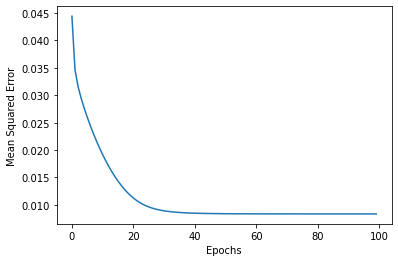

In [27]:
import matplotlib.pyplot as plt

plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## 5. Training ANN through Swedish Auto Insurance dataset with 1 hidden layer

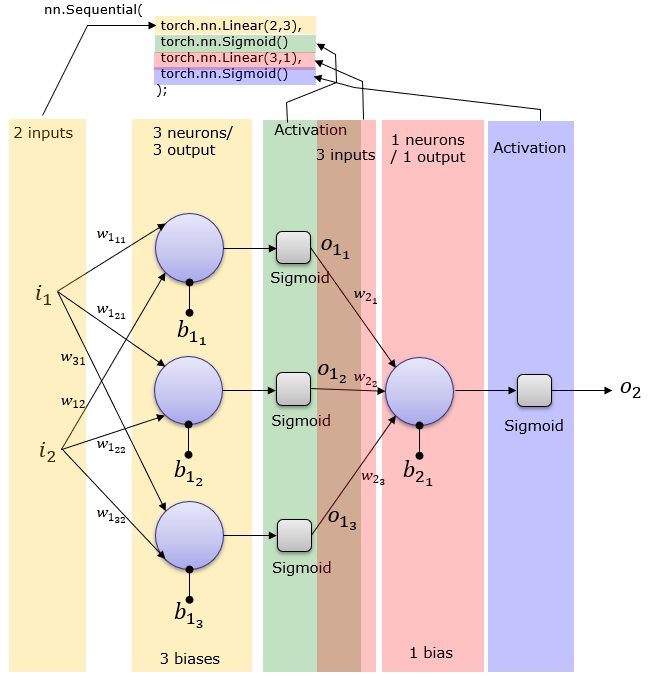

In [28]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a Neural Network
model_net3 = torch.nn.Sequential(torch.nn.Linear(1,3),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.ReLU()
                                 );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net3.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net3.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-28-0ad25dd79864>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.04670383036136627
Loss: 0.010318676009774208
Loss: 0.008102582767605782
Loss: 0.007833549752831459
Loss: 0.00779225118458271
Loss: 0.007783721666783094
Loss: 0.007781724911183119
Loss: 0.007781228981912136
Loss: 0.007781093008816242
Loss: 0.007781052030622959


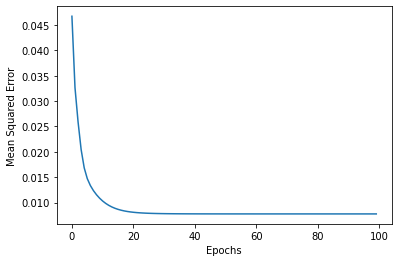

In [29]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## 5. Training ANN through Swedish Auto Insurance dataset with 2 hidden layer

In [30]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(1,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-30-12da485a4403>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.047611068934202194
Loss: 0.013616260141134262
Loss: 0.010555031709372997
Loss: 0.009722488932311535
Loss: 0.00934298150241375
Loss: 0.009115191176533699
Loss: 0.008960345759987831
Loss: 0.008875299245119095
Loss: 0.00879089254885912
Loss: 0.008690055459737778


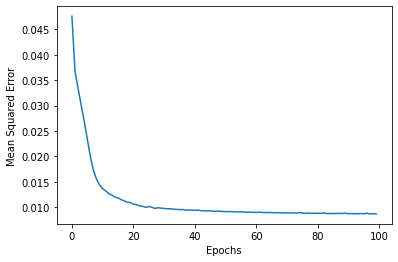

In [31]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

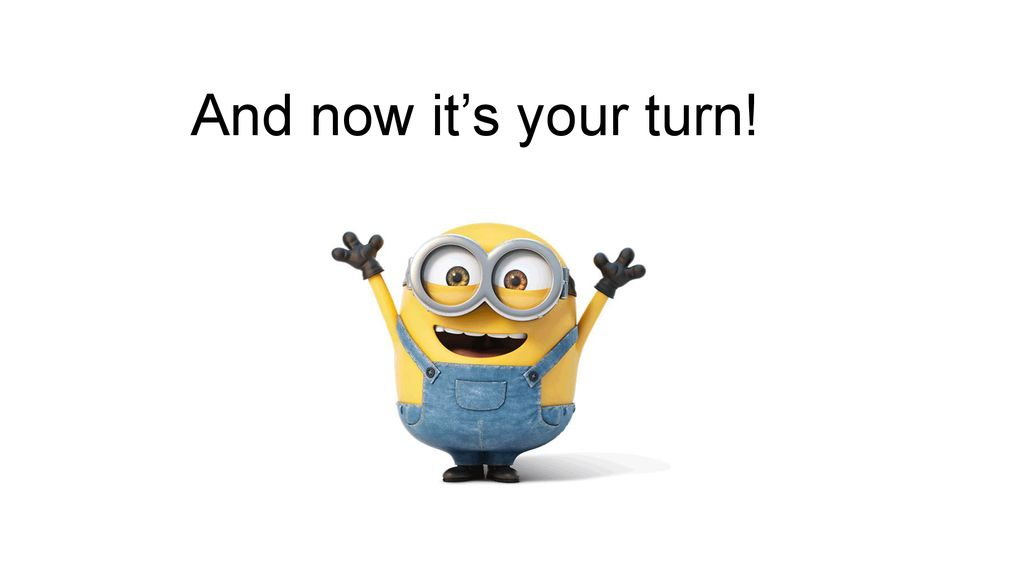

Train ANN through Customer Churn data with 1 and 2 hidden layers!

In [32]:
import pandas as pd

data_raw = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/customer_churn_data.csv')


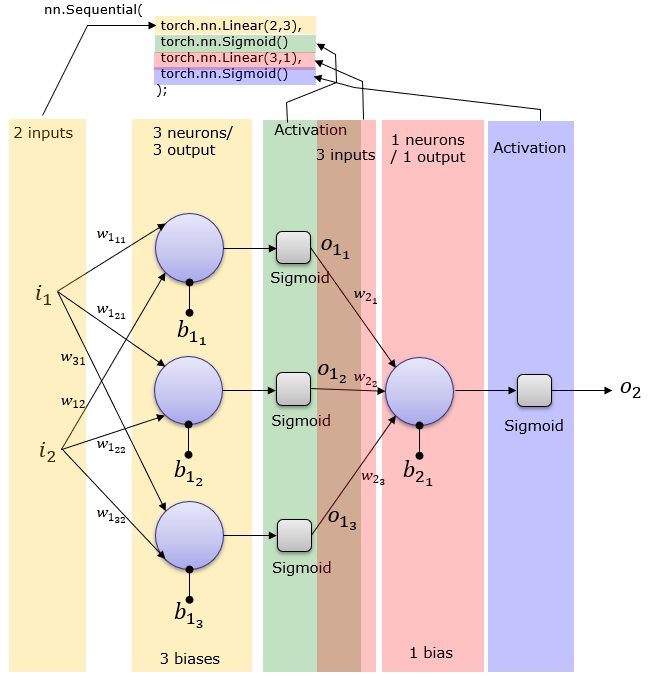